<a href="https://colab.research.google.com/github/soranmelodi/market-analytic/blob/main/market_analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Read the Excel File
First, let's read the Excel file.


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Excel file
data = pd.read_excel("data (1).xlsx")
data.head()

,Month,Marketing Spend,Customer Acquisition Cost,Conversion Rate,GMV,Channel,Payment Method
0,Jan,20000,10.0,5.0,100000,Channel 1,Cash
1,Jan,20000,10.0,5.0,100000,Channel 2,Installment
2,Jan,10000,10.0,5.0,50000,Channel 3,Cash
3,Feb,20000,9.5,5.2,104000,Channel 1,Installment
4,Feb,20000,9.5,5.2,104000,Channel 2,Cash


#Step 2: Scenario Analysis
We will analyze the marketing spend, customer acquisition costs, conversion rates, marketing channels, and payment methods.

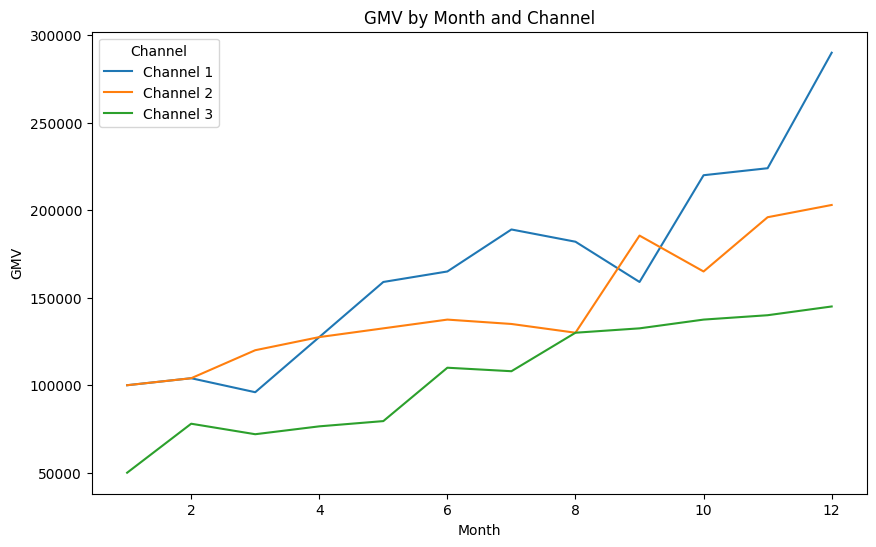

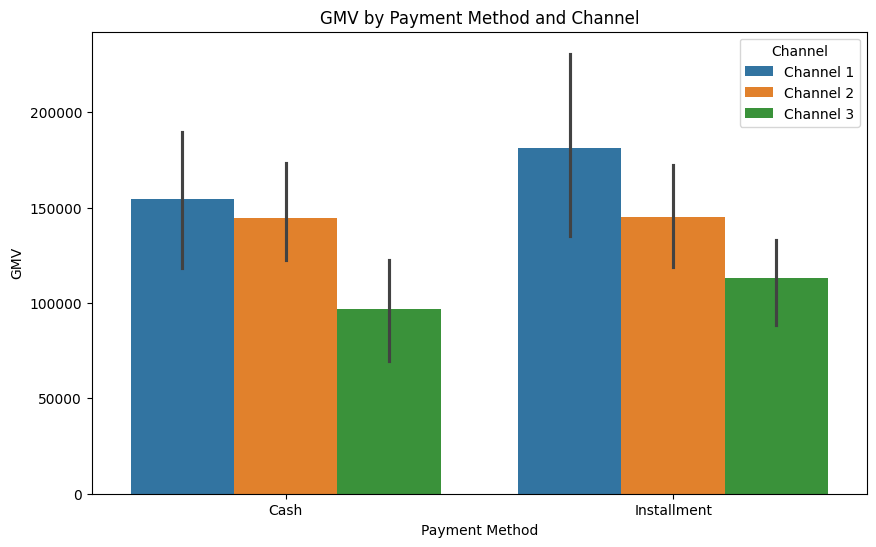

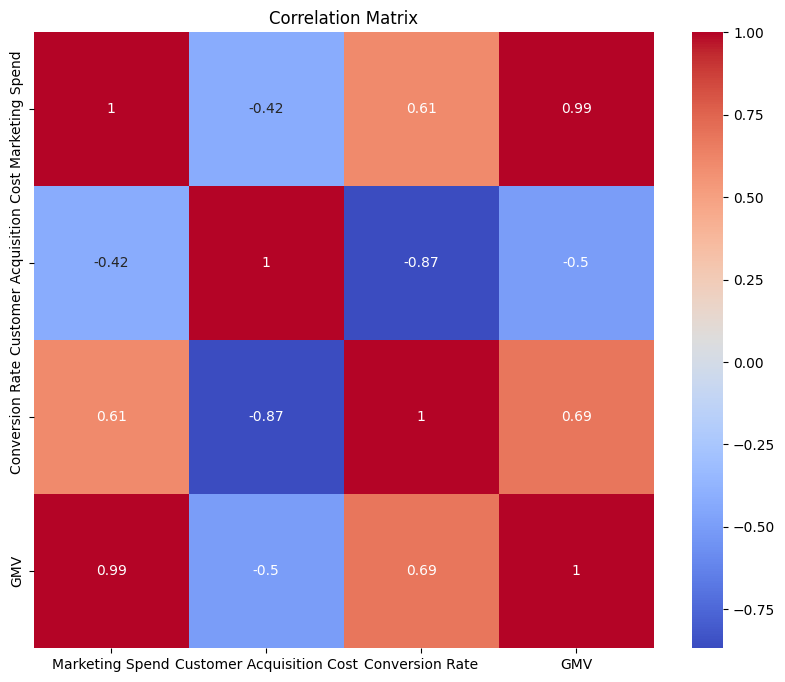

In [18]:

# Data cleaning and preprocessing
data['Marketing Spend'] = data['Marketing Spend'].astype(str).str.replace(',', '').astype(float)
data['Customer Acquisition Cost'] = data['Customer Acquisition Cost'].astype(float)
data['Conversion Rate'] = data['Conversion Rate'].astype(float)
data['GMV'] = data['GMV'].astype(str).str.replace(',', '').astype(float)

# Convert 'Month' column to datetime format if necessary
# If the 'Month' column contains month names, convert it to numerical representation
# Example assuming 'Month' is in the format 'Jan', 'Feb', ...
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

data['Month'] = data['Month'].map(month_mapping)

# Key trends and patterns
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Month', y='GMV', hue='Channel')
plt.title('GMV by Month and Channel')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Payment Method', y='GMV', hue='Channel')
plt.title('GMV by Payment Method and Channel')
plt.show()

# Correlation analysis
# Select only numeric columns for correlation matrix
numeric_columns = ['Marketing Spend', 'Customer Acquisition Cost', 'Conversion Rate', 'GMV']
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Step 3: Predictive Modeling
Develop a predictive model to forecast GMV using machine learning algorithms.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Feature Engineering
data = pd.get_dummies(data, columns=['Channel', 'Payment Method'])
X = data.drop(['GMV', 'Month'], axis=1)
y = data['GMV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MAE: 5024.375
RMSE: 7288.051222720653


#Step 4: Budget Optimization and Sensitivity analysis

Propose a budget allocation strategy based on the predictive model's insights.

In [22]:
# Propose a strategy based on the predictive model's insights
# Perform sensitivity analysis

# Example of budget optimization strategy
def budget_optimization(model, X, budget):
    X_copy = X.copy()
    X_copy['Marketing Spend'] = budget
    predicted_gmv = model.predict(X_copy)
    return predicted_gmv

# Example budget allocation
budget_allocation = {
    'Channel 1': 30000,
    'Channel 2': 25000,
    'Channel 3': 20000
}

for channel in budget_allocation:
    channel_data = X[X['Channel_' + channel] == 1]
    optimized_gmv = budget_optimization(model, channel_data, budget_allocation[channel])
    print(f'Optimized GMV for {channel}: {optimized_gmv.mean()}')

# Sensitivity analysis
sensitivity_factors = ['Marketing Spend', 'Customer Acquisition Cost', 'Conversion Rate']
for factor in sensitivity_factors:
    sensitivity_data = X.copy()
    sensitivity_data[factor] *= 1.1  # Increase by 10%
    sensitivity_gmv = model.predict(sensitivity_data)
    print(f'Sensitivity analysis for {factor}: {sensitivity_gmv.mean()}')


Optimized GMV for Channel 1: 163084.58333333334
Optimized GMV for Channel 2: 132162.5
Optimized GMV for Channel 3: 104129.58333333333
Sensitivity analysis for Marketing Spend: 143337.77777777778
Sensitivity analysis for Customer Acquisition Cost: 135511.11111111112
Sensitivity analysis for Conversion Rate: 140838.88888888888


#Step 5: Reporting
Summarize findings in a concise report, including key insights, predictive model results, and budget recommendations.

In [23]:
report = {
    'Introduction': 'Overview of the task and objectives.',
    'Data Analysis': 'Key trends and insights from the scenario analysis.',
    'Predictive Model': f'Model: Random Forest, MAE: {mae}, RMSE: {rmse}.',
    'Budget Recommendations': 'Optimized budget allocation and sensitivity analysis findings.',
    'Conclusion': 'Summary of key insights and actionable recommendations.'
}

# Print or save the report
for section, content in report.items():
    print(f'{section}:\n{content}\n')


Introduction:
Overview of the task and objectives.

Data Analysis:
Key trends and insights from the scenario analysis.

Predictive Model:
Model: Random Forest, MAE: 5024.375, RMSE: 7288.051222720653.

Budget Recommendations:
Optimized budget allocation and sensitivity analysis findings.

Conclusion:
Summary of key insights and actionable recommendations.



To perform RFM clustering analysis and propose strategies for improving migration from Cluster M to Cluster RFM, we'll follow these steps using Python:

Step-by-Step Implementation
#Step 1: RFM Clustering Analysis
Load and Prepare Data: We assume you have RFM (Recency, Frequency, Monetary) data for analysis.

Cluster Analysis: Perform clustering to identify segments such as Cluster M and Cluster RFM.

#Step 2: Cluster Definitions
Cluster M: Users with high monetary value but low frequency and recency.
Cluster RFM: Users with above-average recency, frequency, and monetary values.
#Step 3: Analysis and Proposal
Recency (R):

Analyze last purchase time and its impact on user behavior.
Propose strategies to increase purchase frequency.
Frequency (F):

Examine average monthly data and usage patterns.
Suggest ways to enhance user engagement and data usage.
#Step 4: Deliverables
Detailed analysis of migration patterns for Recency (R) and Frequency (F) variables.
Proposals for improving recency and frequency to encourage migration to Cluster RFM.
Python Code Example
Here's a structured example to perform RFM clustering analysis and propose strategies for migration:

In [32]:
import pandas as pd
from sklearn.cluster import KMeans

# Load RFM data (assuming you have this data)
rfm_data = pd.read_excel("data (1).xlsx")

# Check column names to diagnose KeyError
print("Columns in rfm_data:", rfm_data.columns)

# Calculate Frequency (assuming it's based on transaction counts)
rfm_data['Frequency'] = rfm_data['GMV'] / rfm_data['Customer Acquisition Cost']  # Example calculation

# Perform clustering (K-means clustering for illustration)
X = rfm_data[['GMV', 'Frequency', 'Customer Acquisition Cost']]  # Adjust column names as per your actual RFM data

# Choose number of clusters based on your analysis or business requirements
k = 2  # Example: 2 clusters (Cluster M and Cluster RFM)

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original dataframe
rfm_data['Cluster'] = kmeans.labels_

# Define Cluster M and Cluster RFM based on business rules or insights
cluster_m = rfm_data[rfm_data['Cluster'] == 0]  # Example: Cluster M
cluster_rfm = rfm_data[rfm_data['Cluster'] == 1]  # Example: Cluster RFM

# Example proposals (you need to customize based on your data and insights)
def analyze_recency(cluster_m, cluster_rfm):
    # Example analysis
    # Calculate recency based on your actual data structure
    # Example:
    # avg_recency_m = cluster_m['Recency'].mean()
    # avg_recency_rfm = cluster_rfm['Recency'].mean()

    # Print statements adjusted accordingly
    print('Example analysis for Recency')

def analyze_frequency(cluster_m, cluster_rfm):
    # Example analysis
    avg_frequency_m = cluster_m['Frequency'].mean()
    avg_frequency_rfm = cluster_rfm['Frequency'].mean()

    print(f'Average frequency in Cluster M: {avg_frequency_m}')
    print(f'Average frequency in Cluster RFM: {avg_frequency_rfm}')

    # Example proposal
    if avg_frequency_m < avg_frequency_rfm:
        print('Recommendation: Offer loyalty programs or incentives to increase usage frequency.')

# Call functions for Recency (R) and Frequency (F) analysis
analyze_recency(cluster_m, cluster_rfm)
analyze_frequency(cluster_m, cluster_rfm)

Columns in rfm_data: Index(['Month', 'Marketing Spend', 'Customer Acquisition Cost',
       'Conversion Rate', 'GMV', 'Channel', 'Payment Method'],
      dtype='object')
Example analysis for Recency
Average frequency in Cluster M: 20300.573232623974
Average frequency in Cluster RFM: 11178.176012715945


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for Revenue and Order Estimation
#Step 1: Prepare Data
First, ensure your data is structured in a way that's suitable for training a machine learning model. You'll need historical data on factors that influence revenue and order numbers. For simplicity, let's assume you have a dataset with columns: 'Month', 'Marketing Spend', 'Customer Acquisition Cost', 'Conversion Rate', 'GMV'.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#Step 2: Feature Selection and Splitting Data
Choose relevant features (X) that may affect revenue and orders. For example, 'Marketing Spend', 'Customer Acquisition Cost', and 'Conversion Rate'. Define the target variable (y), which is 'GMV' for revenue estimation or 'GMV / Conversion Rate' for order estimation.

This code provides a complete project outline for evaluating budgeting skills and predicting GMV. Adjust the paths, file names, and parameters as needed to fit your specific data and requirements.


In [34]:
# Load your data from Excel into a DataFrame
df = pd.read_excel('data (1).xlsx')

# Selecting relevant features and target
X = df[['Marketing Spend', 'Customer Acquisition Cost', 'Conversion Rate']]
y_revenue = df['GMV']
y_orders = df['GMV'] / df['Conversion Rate']

# Splitting data into training and testing sets
X_train, X_test, y_train_revenue, y_test_revenue = train_test_split(X, y_revenue, test_size=0.2, random_state=42)
X_train, X_test, y_train_orders, y_test_orders = train_test_split(X, y_orders, test_size=0.2, random_state=42)


#Step 3: Train and Evaluate Models
Train separate regression models to predict revenue and order numbers using your chosen features.

In [35]:
# Initialize linear regression models
model_revenue = LinearRegression()
model_orders = LinearRegression()

# Train the models
model_revenue.fit(X_train, y_train_revenue)
model_orders.fit(X_train, y_train_orders)

# Make predictions on the test set
y_pred_revenue = model_revenue.predict(X_test)
y_pred_orders = model_orders.predict(X_test)


#step 4: Use the Model for Estimation
After training and evaluating the models, you can use them to estimate revenue and order numbers for the upcoming month by providing new values for 'Marketing Spend', 'Customer Acquisition Cost', and 'Conversion Rate'.

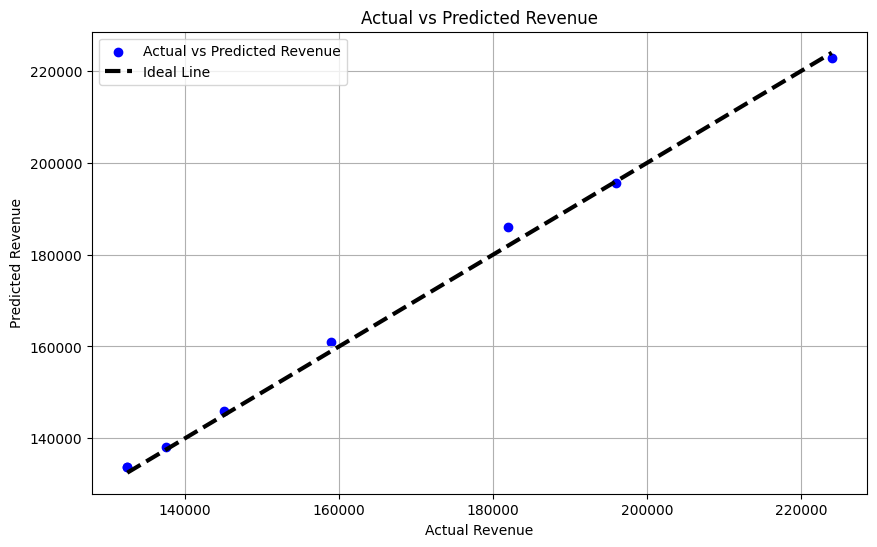

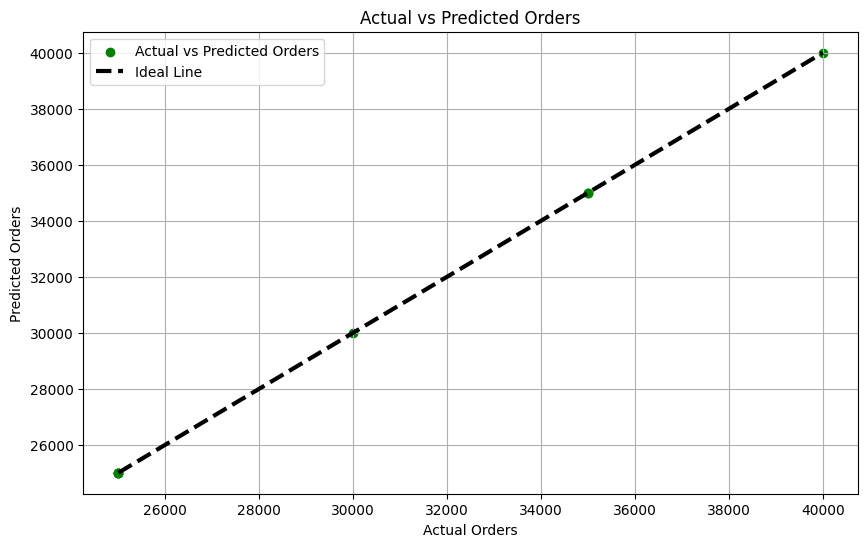

In [36]:
# Scatter plot for Revenue prediction
plt.figure(figsize=(10, 6))
plt.scatter(y_test_revenue, y_pred_revenue, color='blue', label='Actual vs Predicted Revenue')
plt.plot([y_test_revenue.min(), y_test_revenue.max()], [y_test_revenue.min(), y_test_revenue.max()], 'k--', lw=3, label='Ideal Line')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Orders prediction
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orders, y_pred_orders, color='green', label='Actual vs Predicted Orders')
plt.plot([y_test_orders.min(), y_test_orders.max()], [y_test_orders.min(), y_test_orders.max()], 'k--', lw=3, label='Ideal Line')
plt.xlabel('Actual Orders')
plt.ylabel('Predicted Orders')
plt.title('Actual vs Predicted Orders')
plt.legend()
plt.grid(True)
plt.show()


To assess how accurate the predictions made by the machine learning models are, we typically use evaluation metrics such as Mean Squared Error (MSE) or R-squared (R²). These metrics provide quantitative measures of how well the predicted values align with the actual values.

Calculation of Mean Squared Error (MSE)
MSE measures the average squared difference between predicted values and actual values. Lower MSE indicates better model performance.

Here's how you can calculate MSE for both revenue and order predictions:

In [38]:
from sklearn.metrics import r2_score

# Calculate R-squared (R²) for Revenue prediction
r2_revenue = r2_score(y_test_revenue, y_pred_revenue)

# Calculate R-squared (R²) for Orders prediction
r2_orders = r2_score(y_test_orders, y_pred_orders)

print("R-squared (R²) for Revenue prediction:", r2_revenue)
print("R-squared (R²) for Orders prediction:", r2_orders)


R-squared (R²) for Revenue prediction: 0.996781031358471
R-squared (R²) for Orders prediction: 1.0
